# Rregression model to predict house prices



In [4]:
import pandas as pd

# Load the dataset
df = pd.read_csv('house.csv')
df.head()

,price,area_sqft,bedrooms,bathrooms,year_built,location,distance_to_city_center,has_garage,has_pool,condition,crime_rate,school_rating
0,320000,1450,3,2.0,1998,SouthEnd,5.2,1,0,3,8.7,6
1,455000,1870,4,2.5,2005,NorthDale,3.6,1,0,4,3.2,8
2,285000,1210,2,1.0,1975,WestVilla,7.8,1,0,2,12.5,4
3,510000,2100,3,2.5,2010,OakView,2.9,1,0,4,2.8,9
4,720000,2800,4,3.5,2015,RiverSide,2.1,1,1,5,1.5,9


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   price                    40 non-null     int64  
 1   area_sqft                40 non-null     int64  
 2   bedrooms                 40 non-null     int64  
 3   bathrooms                40 non-null     float64
 4   year_built               40 non-null     int64  
 5   location                 40 non-null     object 
 6   distance_to_city_center  40 non-null     float64
 7   has_garage               40 non-null     int64  
 8   has_pool                 40 non-null     int64  
 9   condition                40 non-null     int64  
 10  crime_rate               40 non-null     float64
 11  school_rating            40 non-null     int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 3.9+ KB


In [36]:
df.describe()

,price,area_sqft,bedrooms,bathrooms,year_built,distance_to_city_center,has_garage,has_pool,condition,crime_rate,school_rating
count,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000
mean,506150.000000,1993.750000,3.375000,2.400000,2001.750000,4.252500,0.925000,0.325000,3.675000,5.597500,7.300000
std,206944.629037,675.386641,0.837808,0.885785,15.227758,2.214056,0.266747,0.474342,0.971055,4.187496,2.028009
min,245000.000000,980.000000,2.000000,1.000000,1965.000000,0.800000,0.000000,0.000000,2.000000,1.000000,3.000000
25%,318750.000000,1410.000000,3.000000,1.875000,1994.250000,2.875000,1.000000,0.000000,3.000000,2.450000,6.000000
50%,470000.000000,1895.000000,3.000000,2.500000,2007.000000,3.800000,1.000000,0.000000,4.000000,3.400000,8.000000
75%,660000.000000,2412.500000,4.000000,3.000000,2012.250000,5.575000,1.000000,1.000000,4.000000,8.950000,9.000000
max,940000.000000,3450.000000,5.000000,4.000000,2020.000000,9.500000,1.000000,1.000000,5.000000,15.300000,10.000000


In [6]:
df.duplicated().sum()

0

In [7]:
df['location'].value_counts()

location
NorthDale         5
OakView           5
RiverSide         5
LakeFront         5
SouthEnd          4
WestVilla         4
CentralHeights    4
EastSide          4
GreenValley       3
IndustrialDist    1
Name: count, dtype: int64

## Baseline model

In [11]:

X = df.select_dtypes(include=['int64', 'float64']).drop('price', axis=1)
y = df['price']
print(x.shape)
print(y.shape)

(40, 10)
(40,)


In [12]:
# Split into train-test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Training the baseline model
from sklearn.linear_model import LinearRegression

base_model = LinearRegression()
base_model.fit(X_train, y_train)
y_pred = base_model.predict(X_test)

In [14]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Baseline Model Evaluation Metrics")
print(f"Mean Absolute Error (MAE):      {mae:.2f}")
print(f"Mean Squared Error (MSE):       {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared Score (R²):           {r2:.4f}")


Baseline Model Evaluation Metrics
Mean Absolute Error (MAE):      18738.53
Mean Squared Error (MSE):       525916829.64
Root Mean Squared Error (RMSE): 22932.88
R-squared Score (R²):           0.9840


In [ ]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Prices")
plt.grid(True)
plt.show()


## Try to Improve Model

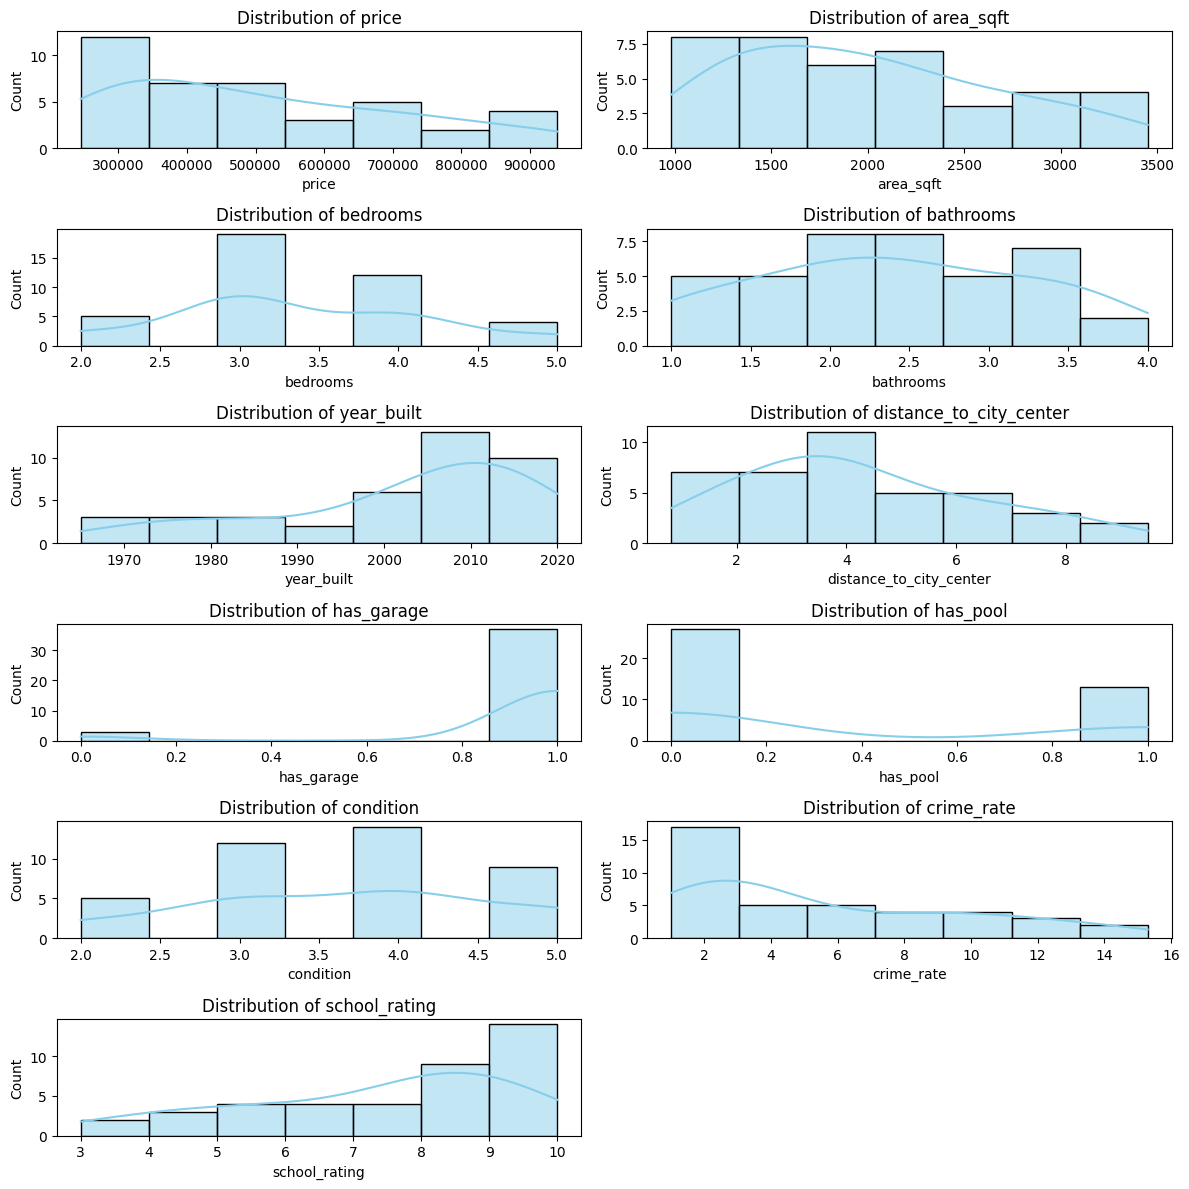

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get list of numerical columns
num_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Create distribution plots
plt.figure(figsize=(12, 12))
for i, col in enumerate(num_features):
    plt.subplot((len(num_features) + 1) // 2, 2, i+1)  # auto adjusts rows
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


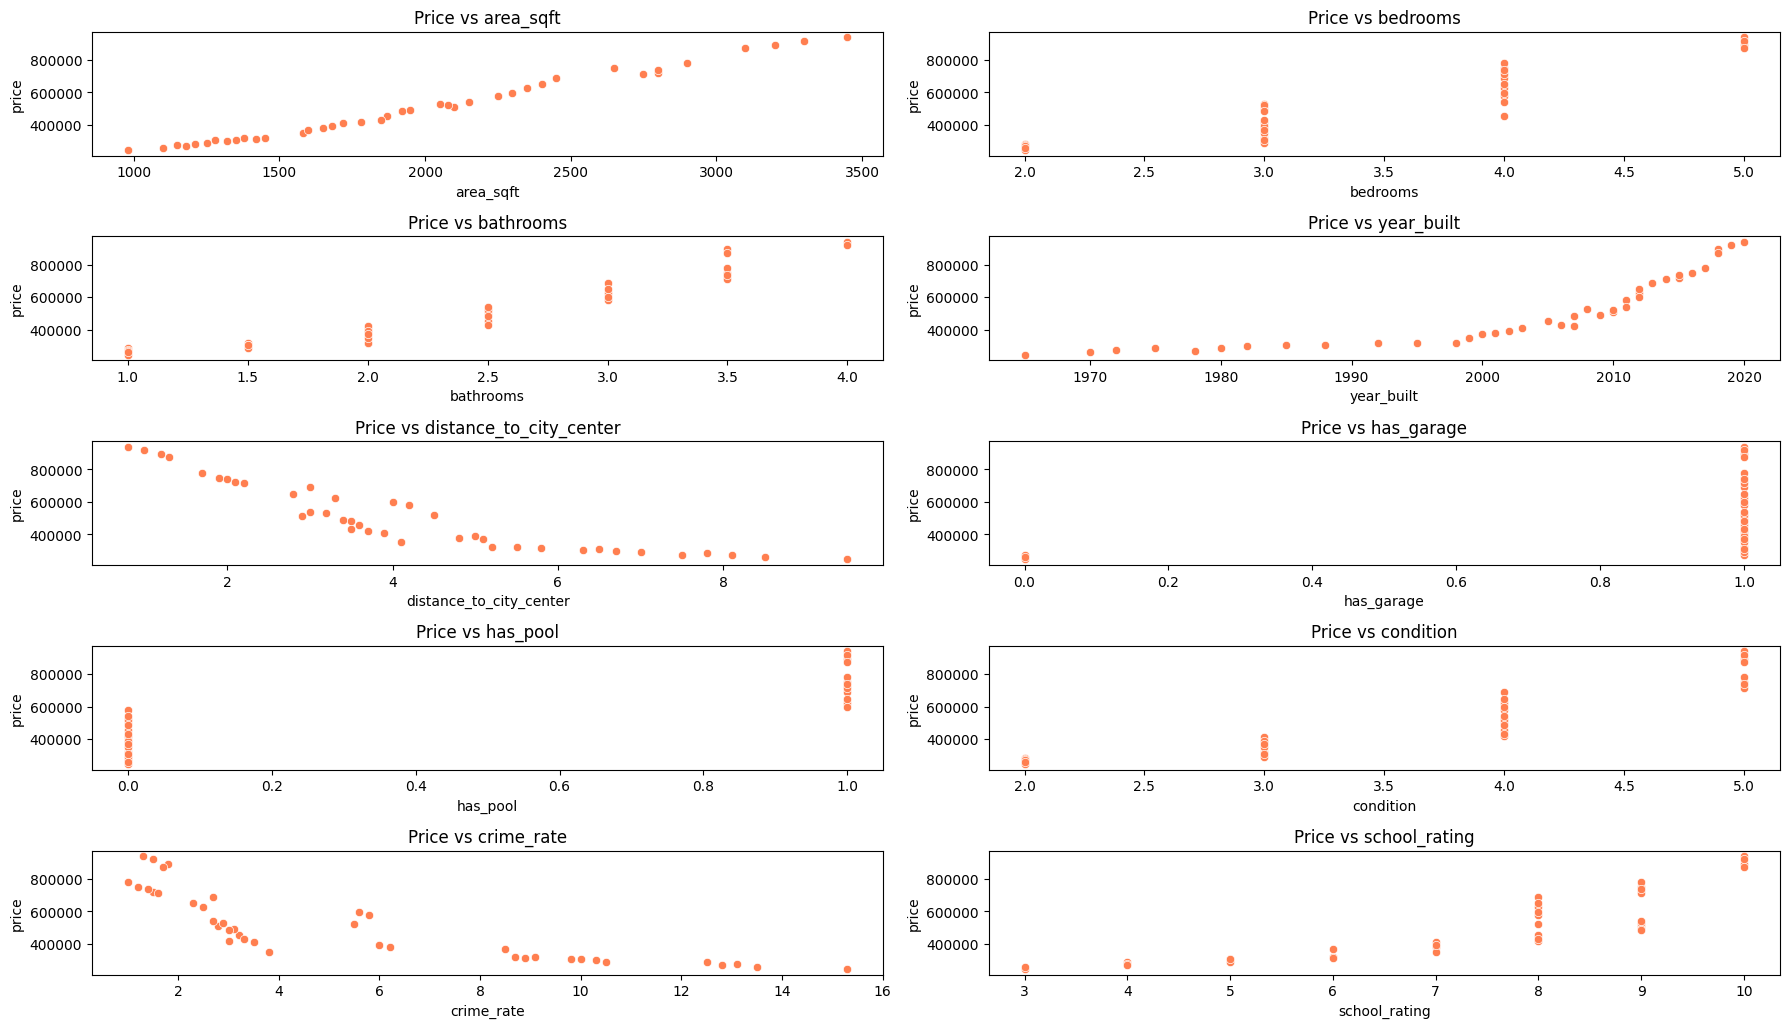

In [50]:
# Scatterplots for continuous variables vs price
plt.figure(figsize=(18, 12))
for i, col in enumerate(num_features[1:]):  # Exclude 'price' itself
    plt.subplot((len(num_features) + 1) // 2, 2, i+1)
    sns.scatterplot(data=df, x=col, y='price', color='coral')
    plt.title(f'Price vs {col}')
plt.tight_layout()
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_24072\3121128057.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='location', y='price', data=location_price, palette='viridis')


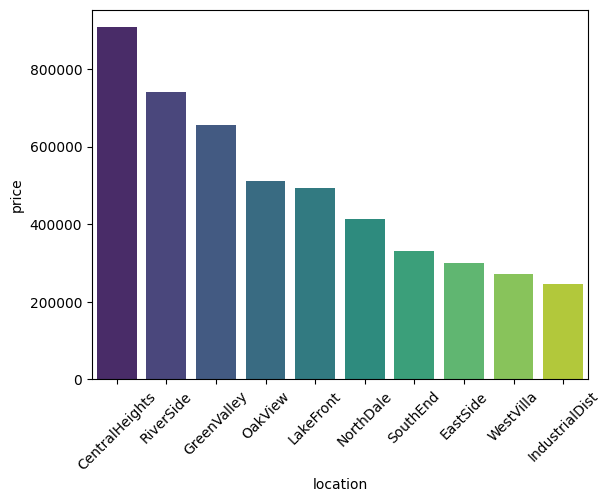

In [58]:
location_price = df.groupby('location')['price'].mean().sort_values(ascending=False).reset_index()

sns.barplot(x='location', y='price', data=location_price, palette='viridis')
plt.xticks(rotation=45)
plt.show()

In [59]:
df_encoded = pd.get_dummies(df, columns=['location'], drop_first=True)
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   price                    40 non-null     int64  
 1   area_sqft                40 non-null     int64  
 2   bedrooms                 40 non-null     int64  
 3   bathrooms                40 non-null     float64
 4   year_built               40 non-null     int64  
 5   distance_to_city_center  40 non-null     float64
 6   has_garage               40 non-null     int64  
 7   has_pool                 40 non-null     int64  
 8   condition                40 non-null     int64  
 9   crime_rate               40 non-null     float64
 10  school_rating            40 non-null     int64  
 11  location_EastSide        40 non-null     bool   
 12  location_GreenValley     40 non-null     bool   
 13  location_IndustrialDist  40 non-null     bool   
 14  location_LakeFront       40 

In [16]:
x1 = df_encoded.drop('price', axis=1)
y1 = df_encoded['price']

In [ ]:
from sklearn.preprocessing import StandardScaler

# Select numeric columns only
numeric_cols = ['area_sqft', 'bedrooms', 'bathrooms', 'year_built',
                'distance_to_city_center', 'has_garage', 'has_pool',
                'condition', 'crime_rate', 'school_rating']

# Initialize scaler
scaler = StandardScaler()

# Fit and transform numeric columns
x1[numeric_cols] = scaler.fit_transform(x1[numeric_cols])
x1.head()

In [21]:
import numpy as np

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.2, random_state=42)

# Train model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict
y_pred = lr_model.predict(X_test)

# Evaluate
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Linear Regression After Preprocessing")
print(f"MAE:  {mae:.2f}")
print(f"MSE:  {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²:   {r2:.4f}")


Linear Regression After Preprocessing
MAE:  33169.25
MSE:  1331378462.48
RMSE: 36488.06
R²:   0.9594


In [23]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Train Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict
y_pred_rf = rf_model.predict(X_test)

# Evaluate
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Regressor")
print(f"MAE:  {mae_rf:.2f}")
print(f"MSE:  {mse_rf:.2f}")
print(f"RMSE: {rmse_rf:.2f}")
print(f"R²:   {r2_rf:.4f}")


Random Forest Regressor
MAE:  18428.75
MSE:  822954412.50
RMSE: 28687.18
R²:   0.9749


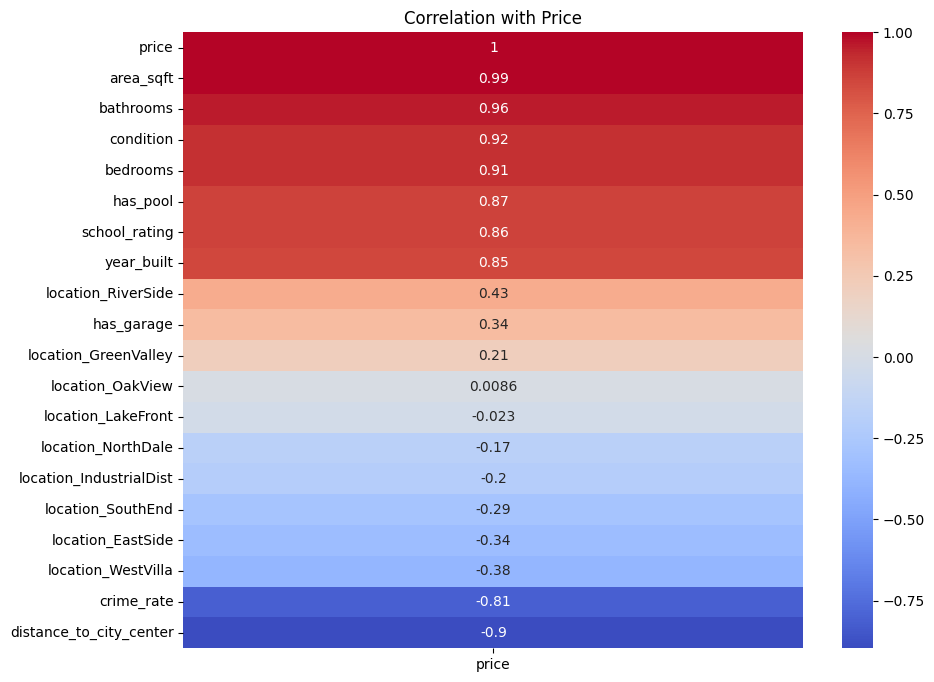

In [61]:
import seaborn as sns

corr_matrix = df_encoded.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix[['price']].sort_values(by='price', ascending=False), annot=True, cmap='coolwarm')
plt.title("Correlation with Price")
plt.show()


In [62]:
target_corr = corr_matrix['price'].drop('price')

selected_features_corr = target_corr[abs(target_corr) >= 0.5].index.tolist()

X_selected = df[selected_features_corr]
y = df_encoded['price']


In [63]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)


In [64]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

final_model = LinearRegression()          
final_model.fit(X_train, y_train)
y_pred_lr = final_model.predict(X_test)

# Evaluation
print("Linear Regression")
print("MAE: ", mean_absolute_error(y_test, y_pred_lr))
print("MSE: ", mean_squared_error(y_test, y_pred_lr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("R²:  ", r2_score(y_test, y_pred_lr))


Linear Regression
MAE:  17610.821157154976
MSE:  519923795.928044
RMSE: 22801.837555952457
R²:   0.9841482720897264


In [32]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluation
print("Random Forest Regressor")
print("MAE: ", mean_absolute_error(y_test, y_pred_rf))
print("MSE: ", mean_squared_error(y_test, y_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("R²:  ", r2_score(y_test, y_pred_rf))


Random Forest Regressor
MAE:  21788.75
MSE:  1101769137.5
RMSE: 33192.90793979943
R²:   0.9664086454123292


In [33]:
X_train.columns

Index(['area_sqft', 'bedrooms', 'bathrooms', 'year_built',
       'distance_to_city_center', 'has_pool', 'condition', 'crime_rate',
       'school_rating'],
      dtype='object')

In [35]:
user_data = {
    'area_sqft':int(input("Enter number of area in sqft: ")),
    'bedrooms':int(input("Enter number of bedrooms: ")),
    'bathrooms':int(input("Enter number of bathrooms: ")),
    'year_built':int(input("Enter Year built: ")),
    'distance_to_city_center':int(input("Enter distance to city center: ")),
    'has_pool':int(input("pool: ")),
    'condition':int(input("Condition")),
    'crime_rate':int(input("Crime rate")),
    'school_rating':int(input("School rate "))

}

user_df = pd.DataFrame([user_data])
predicted_price = final_model.predict(user_df)[0]
print(f"Predicted House Price: ₹{predicted_price:,.2f}")


Predicted House Price: ₹111,393,303.40


In [65]:
import joblib

joblib.dump(final_model, 'model.pkl')


['model.pkl']